<a href="https://colab.research.google.com/github/antonychackotc/project-4/blob/main/2nd_4m_feature_selection_%26_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

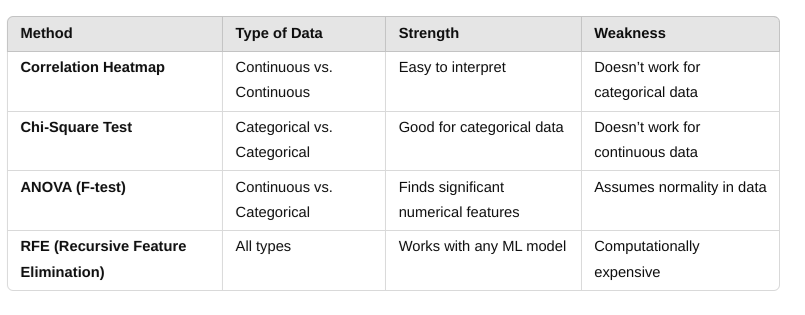

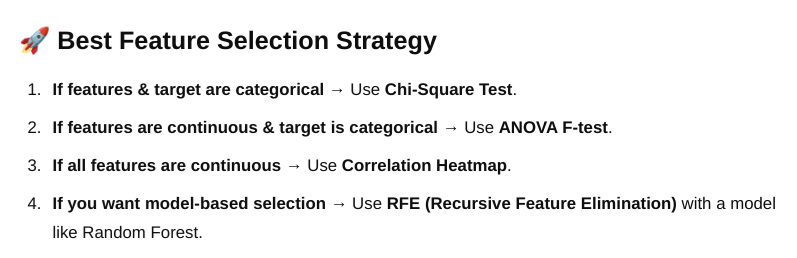

In [ ]:
##################################################################

In [ ]:
import pandas as pd
df=pd.read_csv('/content/feature-engineered-updated.csv')

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobLevel,...,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research_and_Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Tenure_Category,Performance_Score,Engagement_Score
0,41,1,1102,1,2,1,1,0,94,2,...,8,285,510,False,True,False,True,New,2.9,1.2
1,37,1,1373,2,2,1,4,1,92,1,...,6,217,68,True,False,False,True,New,3.0,2.0
2,33,2,1392,3,4,1,5,0,56,1,...,1,243,510,True,False,True,False,Intermediate,3.0,2.2
3,27,1,591,2,1,1,7,1,40,1,...,9,217,389,True,False,True,False,New,2.7,1.8
4,32,2,1005,2,2,1,8,1,79,1,...,0,217,510,True,False,False,True,Intermediate,3.1,1.4


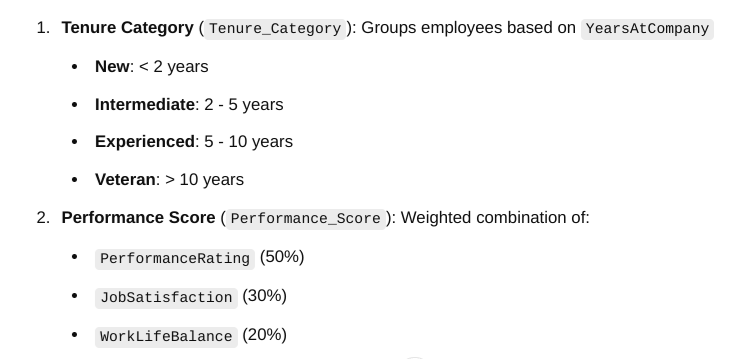

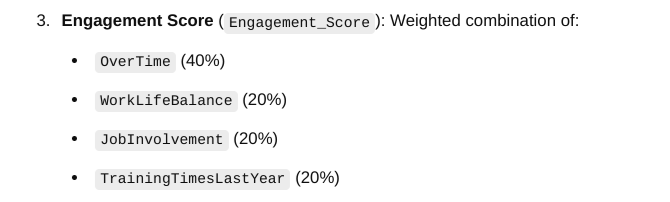

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1244 non-null   int64  
 1   BusinessTravel                       1244 non-null   int64  
 2   DailyRate                            1244 non-null   int64  
 3   DistanceFromHome                     1244 non-null   int64  
 4   Education                            1244 non-null   int64  
 5   EmployeeCount                        1244 non-null   int64  
 6   EmployeeNumber                       1244 non-null   int64  
 7   Gender                               1244 non-null   int64  
 8   HourlyRate                           1244 non-null   int64  
 9   JobLevel                             1244 non-null   int64  
 10  MonthlyIncome                        1244 non-null   int64  
 11  MonthlyRate                   

# **Methods of Feature Selection**

In [ ]:
df.nunique()

,0
Age,43
BusinessTravel,3
DailyRate,806
DistanceFromHome,29
Education,5
EmployeeCount,1
EmployeeNumber,1244
Gender,2
HourlyRate,71
JobLevel,5


<Axes: ylabel='MonthlyIncome'>

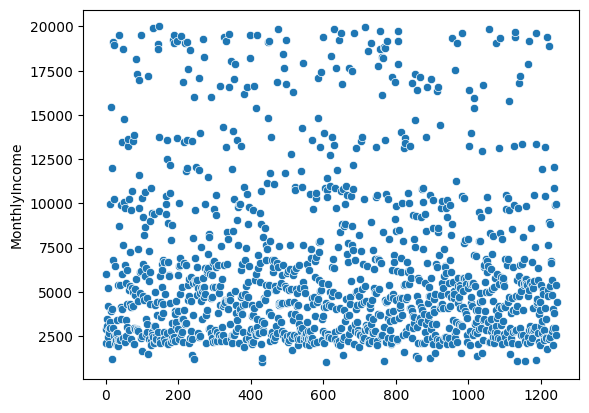

In [ ]:
import seaborn as sns
sns.scatterplot(df['MonthlyIncome'])

# **This is not Linear Type this is Discret**

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Reload dataset
file_path = "/content/feature-engineered-updated.csv"
df = pd.read_csv(file_path)

# Define target variable
y = df["MonthlyIncome"]  # Continuous target for regression
X = df.drop(columns=["MonthlyIncome"])

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["int64", "object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["float64"]).columns.tolist()

# Encode categorical features (Label Encoding for non-numeric categories)
label_encoders = {}
for col in categorical_features:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store encoder for reference

# Ensure categorical variables are non-negative
X_categorical = X[categorical_features].astype(int)

# Normalize numerical features for ANOVA
scaler = MinMaxScaler()
X_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# 1️⃣ ANOVA (F-Test) for Numerical Features (Regression Version)
f_scores, f_pvalues = f_regression(X_numerical, y)
anova_results = pd.DataFrame({"Feature": numerical_features, "F Score": f_scores, "p-value": f_pvalues})
anova_results = anova_results.sort_values(by="F Score", ascending=False)

# 2️⃣ Mutual Information (MI) for Regression
mi_scores = mutual_info_regression(X, y)
mi_results = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_results = mi_results.sort_values(by="MI Score", ascending=False)

# 3️⃣ Recursive Feature Elimination (RFE) using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(rf_model, n_features_to_select=10)  # Selecting top 10 features
rfe.fit(X, y)
rfe_results = pd.DataFrame({"Feature": X.columns, "RFE Ranking": rfe.ranking_})
rfe_results = rfe_results.sort_values(by="RFE Ranking", ascending=True)

# Display top features from each method
anova_results.head(10), mi_results.head(10), rfe_results.head(10)

(                   Feature      F Score        p-value
 0        TotalWorkingYears  1083.678435  2.199813e-171
 1           YearsAtCompany   292.948893   3.964257e-59
 2  YearsSinceLastPromotion   129.349484   1.395421e-28
 3        Performance_Score     0.051995   8.196649e-01
 4         Engagement_Score     0.022944   8.796286e-01,
                     Feature  MI Score
 9                  JobLevel  1.101511
 30      JobRole_FreqEncoded  0.683051
 20        TotalWorkingYears  0.658645
 21           YearsAtCompany  0.213390
 0                       Age  0.185389
 18       YearsInCurrentRole  0.163981
 19     YearsWithCurrManager  0.147519
 36          Tenure_Category  0.097632
 22  YearsSinceLastPromotion  0.088112
 33         Department_Sales  0.047204,
                 Feature  RFE Ranking
 0                   Age            1
 2             DailyRate            1
 3      DistanceFromHome            1
 6        EmployeeNumber            1
 9              JobLevel            1
 10  

In [ ]:
# Get top 10 features from each method
top_anova = anova_results["Feature"].head(15).tolist()
top_mi = mi_results["Feature"].head(15).tolist()
top_rfe = rfe_results["Feature"].head(15).tolist()

# Create feature sets
feature_sets = {
    "ANOVA": top_anova,
    "Mutual Information": top_mi,
    "RFE": top_rfe
}

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store performance results
regression_results = {}

for method, features in feature_sets.items():
    X_selected = X[features]  # Select only the top features from this method

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train Linear Regression model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R^2 score

    # Store results
    regression_results[method] = {'MSE': mse, 'R^2': r2}

# Display performance results
regression_results


{'ANOVA': {'MSE': 7930444.111897583, 'R^2': 0.5608576910376343},
 'Mutual Information': {'MSE': 1074246.0936991968, 'R^2': 0.9405144398819818},
 'RFE': {'MSE': 1056550.9861008034, 'R^2': 0.9414942930022425}}

In [ ]:
mi_results

,Feature,MI Score
9,JobLevel,1.101511e+00
30,JobRole_FreqEncoded,6.830515e-01
20,TotalWorkingYears,6.586451e-01
21,YearsAtCompany,2.133896e-01
0,Age,1.853887e-01
18,YearsInCurrentRole,1.639808e-01
19,YearsWithCurrManager,1.475192e-01
36,Tenure_Category,9.763217e-02
22,YearsSinceLastPromotion,8.811203e-02
33,Department_Sales,4.720434e-02


In [ ]:
mi_results.shape

(39, 2)

In [ ]:
rfe_results

,Feature,RFE Ranking
0,Age,1
2,DailyRate,1
3,DistanceFromHome,1
6,EmployeeNumber,1
9,JobLevel,1
10,MonthlyRate,1
8,HourlyRate,1
21,YearsAtCompany,1
20,TotalWorkingYears,1
30,JobRole_FreqEncoded,1


In [ ]:
rfe_results.shape

(39, 2)

In [ ]:
print(anova_results.shape)
print(mi_results.shape)
print(rfe_results.shape)

(5, 3)
(39, 2)
(39, 2)


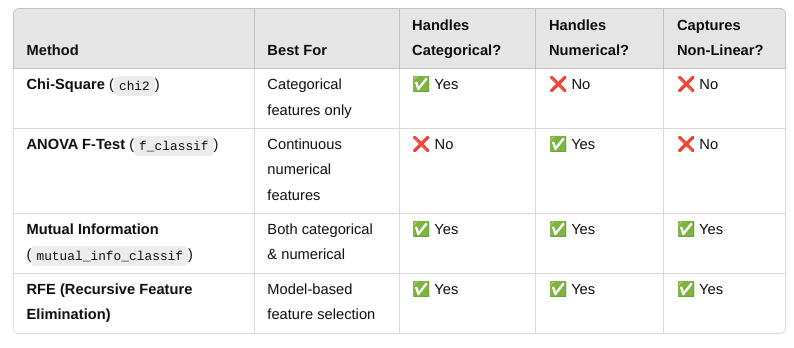

# **Move to Mutual Information or RFE is best because they handle bith numerical and categorical**

In [ ]:
##########################################################################

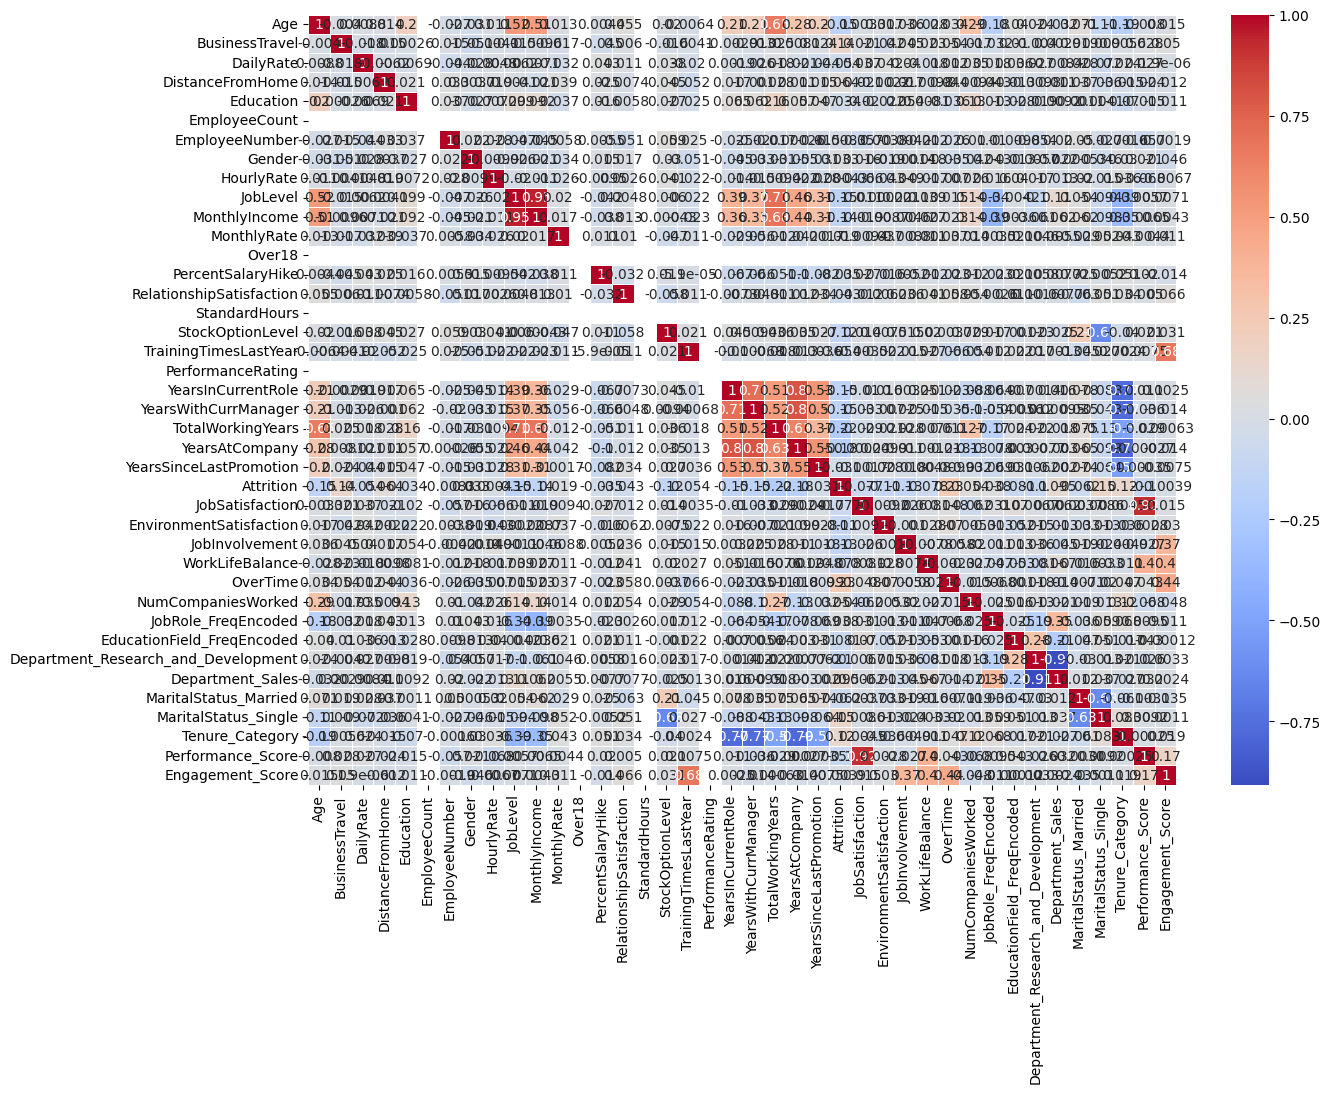

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric using label encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

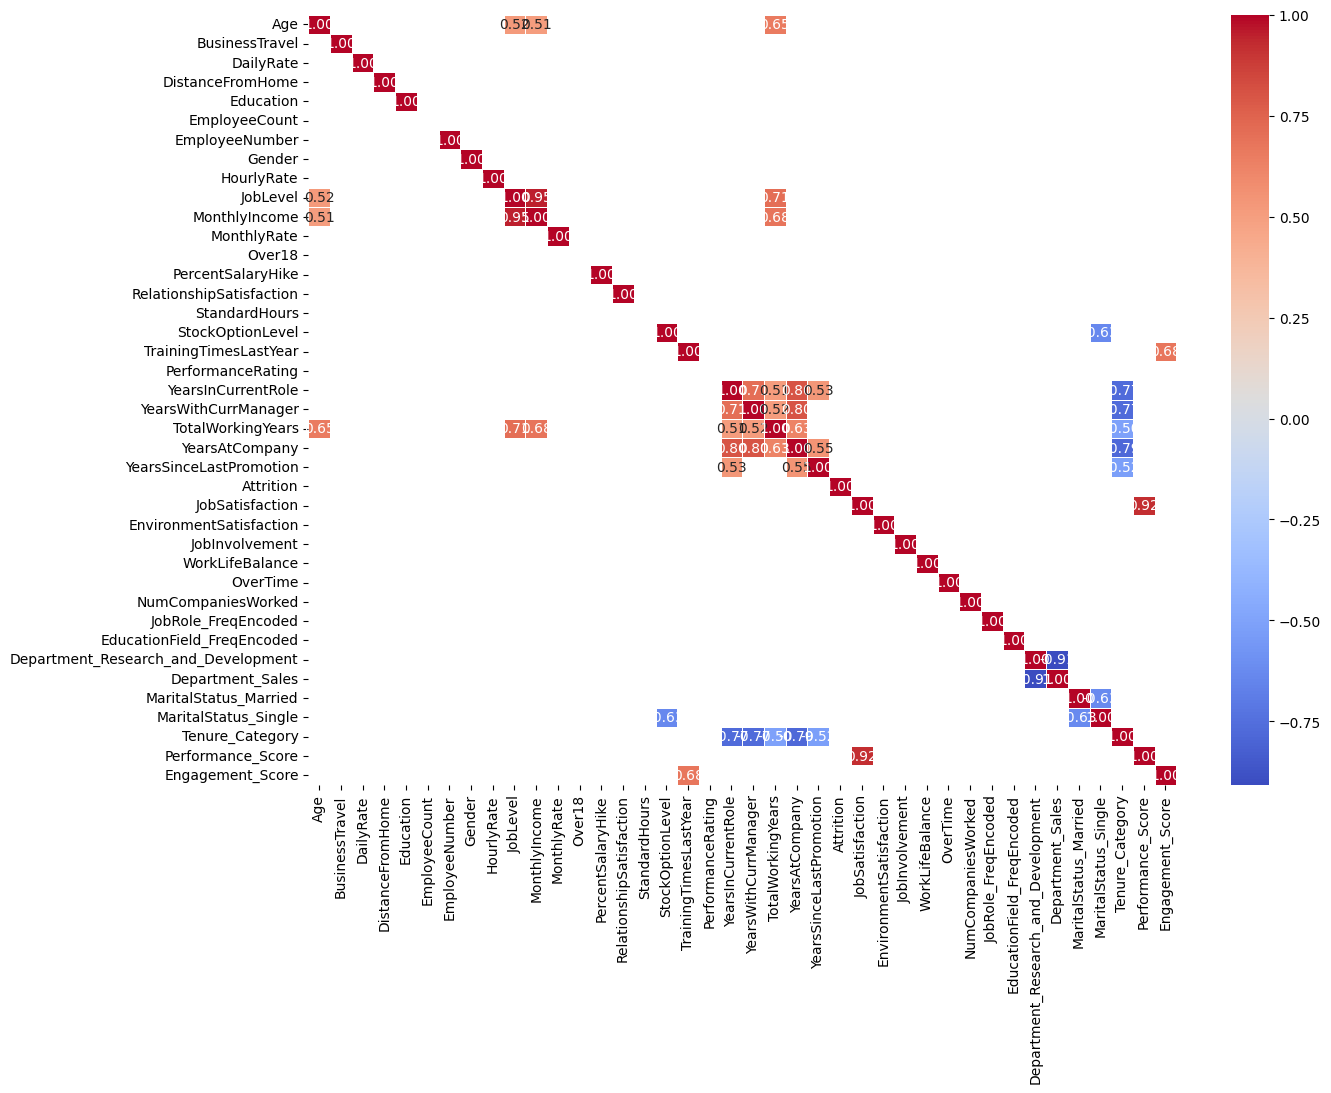

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

corr_matrix = df.corr()


corr_matrix = df.corr()
mask = (corr_matrix < 0.5) & (corr_matrix > -0.5)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=mask)
plt.show()

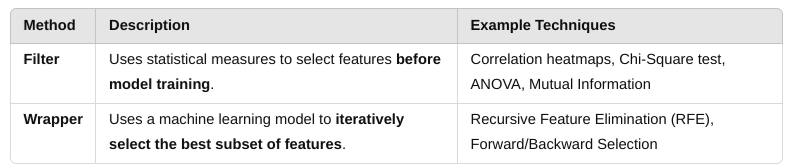

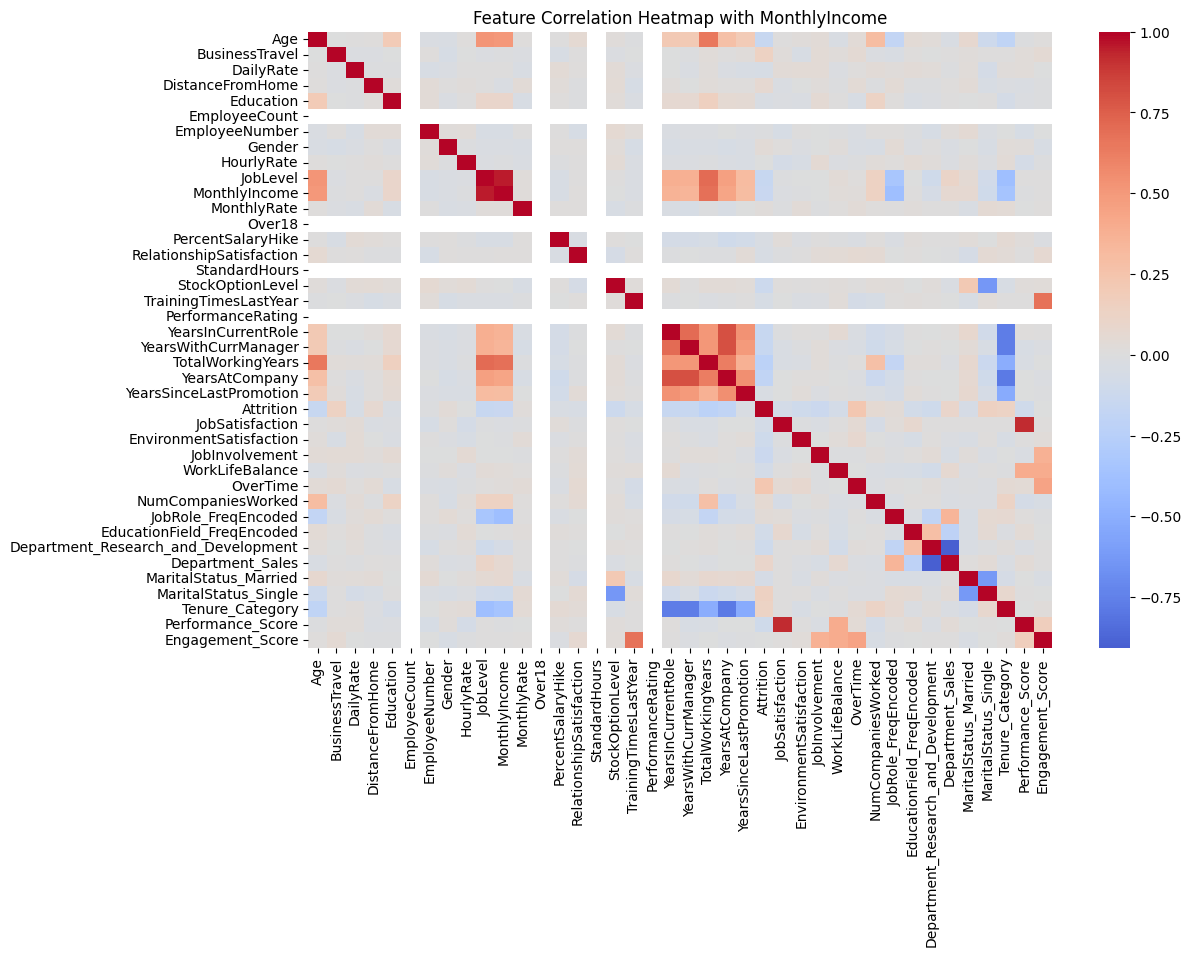

Top 14 Features Most Correlated with MonthlyIncome:
JobLevel                   0.949365
TotalWorkingYears          0.682614
Age                        0.505500
YearsAtCompany             0.436867
JobRole_FreqEncoded        0.388184
YearsInCurrentRole         0.364934
Tenure_Category            0.349617
YearsWithCurrManager       0.346969
YearsSinceLastPromotion    0.307120
Attrition                  0.144153
NumCompaniesWorked         0.140684
MaritalStatus_Single       0.097749
Education                  0.092113
MaritalStatus_Married      0.062499
Name: MonthlyIncome, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/feature-engineered-updated.csv")  # Change the path accordingly

# Convert categorical features to numeric (if any)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap with MonthlyIncome")
plt.show()

# Extract top correlated features with MonthlyIncome
correlation_with_target = correlation_matrix["MonthlyIncome"].abs().sort_values(ascending=False)
top_features = correlation_with_target[1:15]  # Exclude MonthlyIncome itself

print("Top 14 Features Most Correlated with MonthlyIncome:")
print(top_features)


# **Top 14 Features for MonthlyIncome**

In [ ]:
feature_corr=df[['JobLevel','TotalWorkingYears','Age','YearsAtCompany','JobRole_FreqEncoded','YearsInCurrentRole','Tenure_Category','YearsWithCurrManager','YearsSinceLastPromotion']]
target_corr=df['MonthlyIncome']

# **Check Line Plot for Target Columns to find the Problem Type**

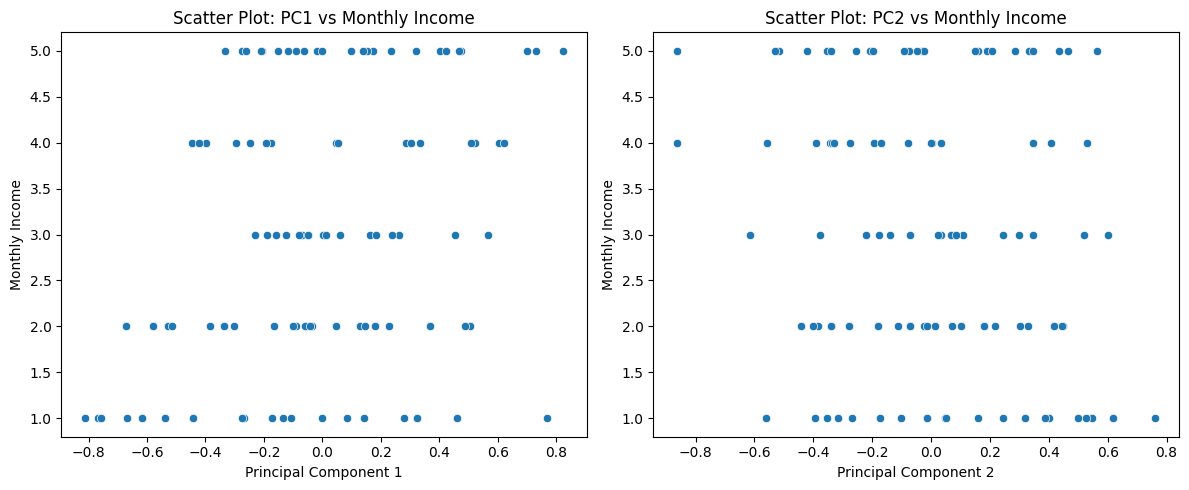

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Simulating a dataset (since df is not provided)
np.random.seed(42)
num_samples = 100

# Generating random data for 10 features
feature_corr = np.random.rand(num_samples, 10)
target_corr = np.random.randint(1, 6, num_samples)  # Assuming YearsSinceLastPromotion is categorical (1-5)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_features = pca.fit_transform(feature_corr)

# Creating scatter plots for the first two principal components vs YearsSinceLastPromotion
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i in range(2):
    sns.scatterplot(x=pca_features[:, i], y=target_corr, ax=axes[i])
    axes[i].set_xlabel(f'Principal Component {i+1}')
    axes[i].set_ylabel('Monthly Income')
    axes[i].set_title(f'Scatter Plot: PC{i+1} vs Monthly Income')

plt.tight_layout()
plt.show()

In [ ]:
##############################################################################################

# **1) Linear Regression Based on Correlation Heatmap (Filter Method)**

In [ ]:
feature_corr=df[['JobLevel','TotalWorkingYears','JobRole_FreqEncoded','YearsInCurrentRole']]
target_corr=df['MonthlyIncome']

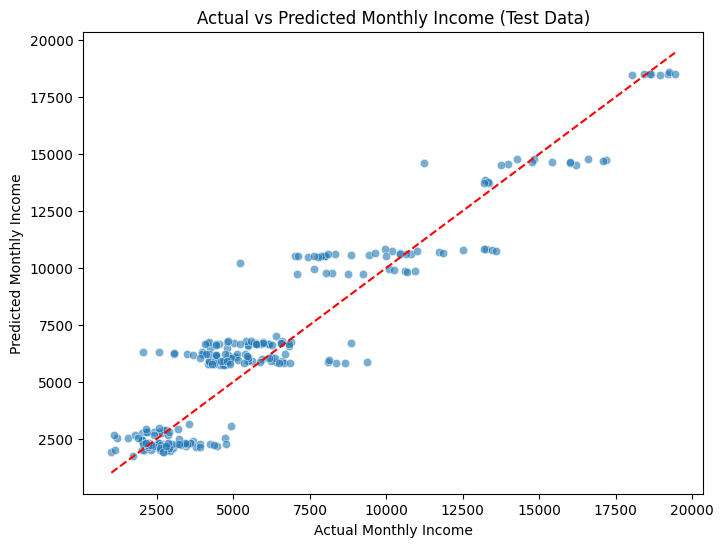


### Model Performance Metrics ###
Train MSE: 2056779.8266, Test MSE: 2137514.7372
Train MAE: 1094.6984, Test MAE: 1132.1273
Train RMSE: 1434.1478, Test RMSE: 1462.0242
Train R²: 0.9114, Test R²: 0.8816
Train Adjusted R²: 0.9111, Test Adjusted R²: 0.8797

The model is GENERALIZING WELL. Performance is balanced between training and testing data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_corr, target_corr, test_size=0.2, random_state=42)

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Actual vs Predicted Monthly Income (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization (Lasso, Ridge) or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


# **Random Forest Regression**

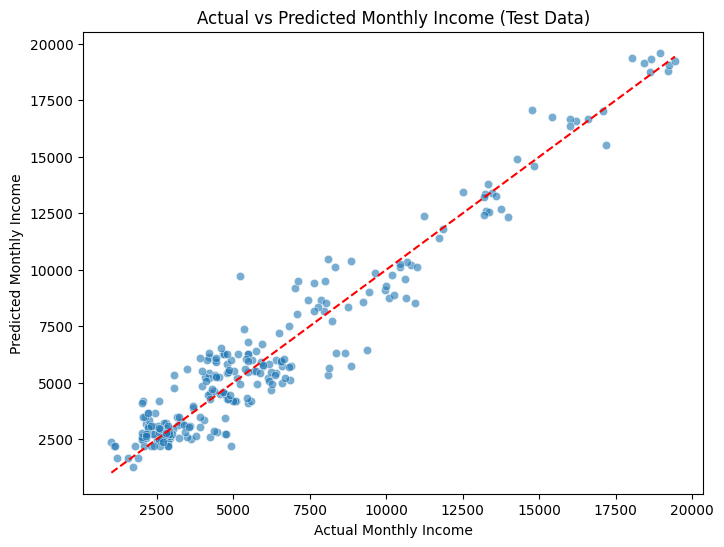


### Model Performance Metrics ###
Train MSE: 454536.9473, Test MSE: 1227385.1676
Train MAE: 471.2028, Test MAE: 858.8457
Train RMSE: 674.1936, Test RMSE: 1107.8742
Train R²: 0.9804, Test R²: 0.9320
Train Adjusted R²: 0.9803, Test Adjusted R²: 0.9309

The model is GENERALIZING WELL. Performance is balanced between training and testing data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_corr, target_corr, test_size=0.2, random_state=42)

# Training Linear Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Actual vs Predicted Monthly Income (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization (Lasso, Ridge) or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


# **Random Forest is better compare to Linear because of error value are low and high accuracy**

In [ ]:
#################################################################################################

# **2) Linear Regression Based on MI(Mutual Information) method (Filter Method)**

In [ ]:
mi_results.head(12)

,Feature,MI Score
9,JobLevel,1.101511
30,JobRole_FreqEncoded,0.683051
20,TotalWorkingYears,0.658645
21,YearsAtCompany,0.213390
0,Age,0.185389
18,YearsInCurrentRole,0.163981
19,YearsWithCurrManager,0.147519
36,Tenure_Category,0.097632
22,YearsSinceLastPromotion,0.088112
33,Department_Sales,0.047204


In [ ]:
feature_mi=df[['JobLevel','JobRole_FreqEncoded','YearsAtCompany','TotalWorkingYears','YearsInCurrentRole']]
target_mi=df['MonthlyIncome']

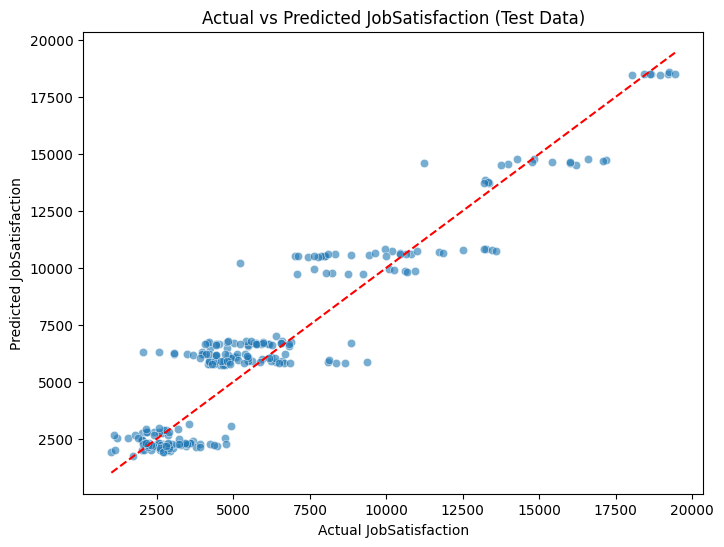


### Model Performance Metrics ###
Train MSE: 2056779.7519, Test MSE: 2137514.0246
Train MAE: 1094.7018, Test MAE: 1132.1355
Train RMSE: 1434.1477, Test RMSE: 1462.0239
Train R²: 0.9114, Test R²: 0.8816
Train Adjusted R²: 0.9110, Test Adjusted R²: 0.8792

The model is GENERALIZING WELL. Performance is balanced between training and testing data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_mi, target_mi, test_size=0.2, random_state=42)

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual JobSatisfaction")
plt.ylabel("Predicted JobSatisfaction")
plt.title("Actual vs Predicted JobSatisfaction (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization (Lasso, Ridge) or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


# **Similar to Heatmap Based Feature Selection**

In [ ]:
#####################################################################################

In [ ]:
rfe_results.head(15)

,Feature,RFE Ranking
0,Age,1
2,DailyRate,1
3,DistanceFromHome,1
6,EmployeeNumber,1
9,JobLevel,1
10,MonthlyRate,1
8,HourlyRate,1
21,YearsAtCompany,1
20,TotalWorkingYears,1
30,JobRole_FreqEncoded,1


In [ ]:
feature_rfe=df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','MonthlyRate','HourlyRate','YearsAtCompany']]
target_rfe=df['MonthlyIncome']

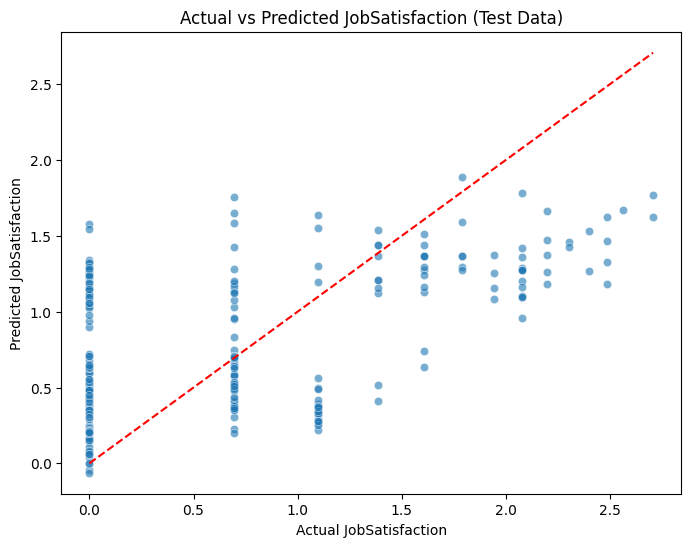


### Model Performance Metrics ###
Train MSE: 0.4123, Test MSE: 0.4542
Train MAE: 0.5323, Test MAE: 0.5560
Train RMSE: 0.6421, Test RMSE: 0.6739
Train R²: 0.3642, Test R²: 0.2674
Train Adjusted R²: 0.3544, Test Adjusted R²: 0.2202

The model is likely UNDERFITTING. Consider adding more features or using a more complex model.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_rfe, target_rfe, test_size=0.2, random_state=42)

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual JobSatisfaction")
plt.ylabel("Predicted JobSatisfaction")
plt.title("Actual vs Predicted JobSatisfaction (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization (Lasso, Ridge) or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


In [ ]:
df['YearsSinceLastPromotion'].value_counts()

,count
MonthlyIncome,
2741,3
2380,3
5562,3
2451,3
6347,3
...,...
3041,1
2579,1
5985,1


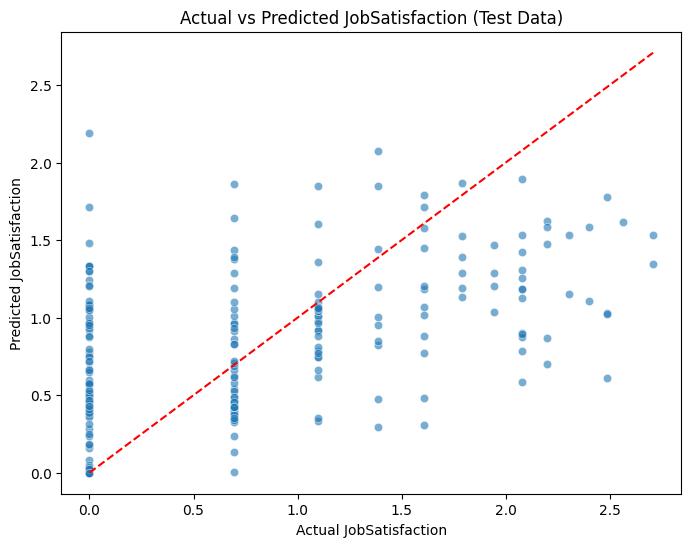


### Model Performance Metrics ###
Train MSE: 0.0572, Test MSE: 0.4475
Train MAE: 0.1819, Test MAE: 0.5112
Train RMSE: 0.2391, Test RMSE: 0.6689
Train R²: 0.9118, Test R²: 0.2782
Train Adjusted R²: 0.9109, Test Adjusted R²: 0.2447

The model is likely OVERFITTING. Consider regularization or feature selection.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_mi, target_mi, test_size=0.2, random_state=42)

# Training Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual JobSatisfaction")
plt.ylabel("Predicted JobSatisfaction")
plt.title("Actual vs Predicted JobSatisfaction (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


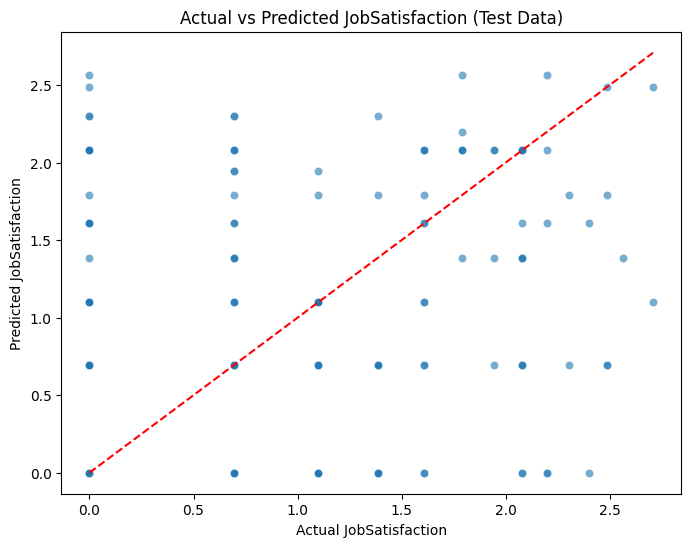


### Model Performance Metrics ###
Train MSE: 0.0000, Test MSE: 0.7681
Train MAE: 0.0000, Test MAE: 0.6004
Train RMSE: 0.0000, Test RMSE: 0.8764
Train R²: 1.0000, Test R²: -0.2390
Train Adjusted R²: 1.0000, Test Adjusted R²: -0.3187

The model is likely OVERFITTING. Consider regularization or feature selection.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(feature_rfe, target_rfe, test_size=0.2, random_state=42)

# Training Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape  # n = number of samples, p = number of features
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual JobSatisfaction")
plt.ylabel("Predicted JobSatisfaction")
plt.title("Actual vs Predicted JobSatisfaction (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")

# Interpretation
if r2_train > 0.85 and (r2_train - r2_test) > 0.1:
    print("\nThe model is likely OVERFITTING. Consider regularization or feature selection.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model is likely UNDERFITTING. Consider adding more features or using a more complex model.")
else:
    print("\nThe model is GENERALIZING WELL. Performance is balanced between training and testing data.")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluating performance (same as before)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² Calculation
n_train, p = X_train.shape
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))

n_test, _ = X_test.shape
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))

# Output results
print("\n### Model Performance Metrics ###")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}, Test Adjusted R²: {adj_r2_test:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

### Model Performance Metrics ###
Train MSE: 0.2123, Test MSE: 0.4173
Train MAE: 0.3648, Test MAE: 0.5144
Train RMSE: 0.4607, Test RMSE: 0.6460
Train R²: 0.6727, Test R²: 0.3269
Train Adjusted R²: 0.6690, Test Adjusted R²: 0.2957


In [ ]:
df['PerformanceRating'].value_counts()

,count
PerformanceRating,
3,1244
